In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

**Datasets Link**

https://finance.yahoo.com/quote/GOOG/history/

In [ ]:
# Mounting drive


In [2]:
# Reading stock data from drive
data = pd.read_csv('/content/drive/My Drive/Datasets/Stock_data/GOOG.csv',date_parser=True)
data.head()
# started from 2004-08-19

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [3]:
# upto date 2020-09-23
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4048,2020-09-17,1496.000000,1508.297974,1470.000000,1495.530029,1495.530029,1879800
4049,2020-09-18,1498.010010,1503.003052,1437.130005,1459.989990,1459.989990,3103900
4050,2020-09-21,1440.060059,1448.359985,1406.550049,1431.160034,1431.160034,2888800
4051,2020-09-22,1450.089966,1469.520020,1434.530029,1465.459961,1465.459961,1583200
4052,2020-09-23,1458.780029,1460.959961,1407.699951,1415.209961,1415.209961,1654300


In [4]:
# Creating training and testing data

# Considering data from 2004-08-19 to 2020 as training data
# All data from Jan 1 of 2020 to present data are considered as testing data

training_data_ = data[data['Date'] < '2020-01-01'].copy()
training_data_

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3864,2019-12-24,1348.500000,1350.260010,1342.780029,1343.560059,1343.560059,347500
3865,2019-12-26,1346.170044,1361.327026,1344.469971,1360.400024,1360.400024,667500
3866,2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
3867,2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900


In [141]:
testing_data_ = data[data['Date'] > '2020-01-01'].copy()
testing_data_

,Date,Open,High,Low,Close,Adj Close,Volume
3869,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
3870,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
3871,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
3872,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
3873,2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000
...,...,...,...,...,...,...,...
4048,2020-09-17,1496.000000,1508.297974,1470.000000,1495.530029,1495.530029,1879800
4049,2020-09-18,1498.010010,1503.003052,1437.130005,1459.989990,1459.989990,3103900
4050,2020-09-21,1440.060059,1448.359985,1406.550049,1431.160034,1431.160034,2888800
4051,2020-09-22,1450.089966,1469.520020,1434.530029,1465.459961,1465.459961,1583200


In [6]:
# Dropping Date and Adj Close from our training data
training_data = training_data_.drop(['Date','Adj Close'],axis =1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [7]:
# Now scaling our training data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[3.07080191e-04, 8.79291979e-04, 0.00000000e+00, 1.25356905e-04,
        5.43577404e-01],
       [6.89986513e-04, 2.78189186e-03, 1.73314228e-03, 3.15285500e-03,
        2.77885613e-01],
       [4.38255570e-03, 4.44951014e-03, 4.99709621e-03, 3.56690484e-03,
        2.22150736e-01],
       ...,
       [9.99726026e-01, 9.99642423e-01, 9.97425041e-01, 9.92923311e-01,
        1.24858240e-02],
       [9.89839738e-01, 9.90869803e-01, 9.85707361e-01, 9.80912804e-01,
        1.26372774e-02],
       [9.74702051e-01, 9.79457057e-01, 9.81925328e-01, 9.81583871e-01,
        1.15577171e-02]])

In [8]:
x_train =[]
y_train =[]

In [9]:
training_data[60]

array([0.03261895, 0.03337511, 0.03108966, 0.0311449 , 0.40722445])

In [10]:
training_data.shape

(3869, 5)

In [11]:
# Now considering 60 days data as input data and 61 th day opening price data as output
# i.e training_data from index 0 to 59 are considered as input data and 
# 60 th day opening price training_data[60][0] is considered as output

# And occurs iteratively

#  IN 2nd iteration
# input features will be 1-60 and 61 th day opening price will be output label for input



for i in range(60,training_data.shape[0]):
  # fist to i-1 
  x_train.append(training_data[i-60:i])
  # Must be 0 th element of 61th row in each iteration
  y_train.append(training_data[i][0])
  


In [ ]:
x_train

In [ ]:
y_train

In [15]:
# Converting list data to numpy array
x_train,y_train = np.array(x_train),np.array(y_train)

In [16]:
x_train.shape,y_train.shape

((3809, 60, 5), (3809,))

In [17]:
type(x_train)

numpy.ndarray

###**Building Recurrent Neural Network**

In [18]:
 from tensorflow.keras import Sequential
 from tensorflow.keras.layers import Dense,LSTM, Dropout

In [127]:
# ACTUAL MODEL

# regressor = Sequential()

# regressor.add(LSTM(units =60, activation = 'relu',return_sequences = True,input_shape = (x_train.shape[1],x_train.shape[2])))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units =60, activation = 'relu',return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units =80, activation = 'relu',return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units =120, activation = 'relu'))
# regressor.add(Dropout(0.2))

# # Lstm before o/p layer never need to return sequences
# regressor.add(Dense(1))

In [128]:
# TEST MODEL 1

regressor = Sequential()

regressor.add(LSTM(units =60, activation = 'relu',return_sequences = True,input_shape = (x_train.shape[1],x_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units =60, activation = 'relu',return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units =80, activation = 'relu',return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units =100, activation = 'relu',return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units =120, activation = 'relu'))
regressor.add(Dropout(0.2))

# Lstm before o/p layer never need to return sequences
regressor.add(Dense(1))



In [ ]:
# Test Model 2

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [129]:
(x_train.shape[1],x_train.shape[2])

(60, 5)

In [130]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 60, 100)          

In [131]:
 # This is regression problem so we apply loss mean_squared_error
regressor.compile(optimizer ='adam',loss='mean_squared_error',metrics =['accuracy'])

In [132]:
regressor.fit(x_train,y_train,epochs = 20,batch_size = 32)

Epoch 1/20
120/120 [==============================] - 31s 261ms/step - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 2/20
120/120 [==============================] - 26s 221ms/step - loss: 0.0023 - accuracy: 2.6254e-04
Epoch 3/20
120/120 [==============================] - 26s 220ms/step - loss: 0.0022 - accuracy: 2.6254e-04
Epoch 4/20
120/120 [==============================] - 26s 217ms/step - loss: 0.0025 - accuracy: 2.6254e-04
Epoch 5/20
120/120 [==============================] - 26s 217ms/step - loss: 0.0019 - accuracy: 2.6254e-04
Epoch 6/20
120/120 [==============================] - 26s 216ms/step - loss: 0.0019 - accuracy: 2.6254e-04
Epoch 7/20
120/120 [==============================] - 26s 216ms/step - loss: 0.0017 - accuracy: 2.6254e-04
Epoch 8/20
120/120 [==============================] - 26s 217ms/step - loss: 0.0016 - accuracy: 2.6254e-04
Epoch 9/20
120/120 [==============================] - 26s 218ms/step - loss: 0.0019 - accuracy: 2.6254e-04
Epoch 10/20
120/120 [================

### **Prepare Test Datasets**

To predict price of next date, we need previous 60 days data for testing

In [142]:
testing_data_.head()
# To predict opening price of first testing data
# We need 60 data from previous training_data_

,Date,Open,High,Low,Close,Adj Close,Volume
3869,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
3870,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
3871,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
3872,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
3873,2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000


In [143]:
training_data_.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
3809,2019-10-07,1204.400024,1218.203979,1203.750000,1207.680054,1207.680054,842900
3810,2019-10-08,1197.589966,1206.079956,1189.010010,1189.130005,1189.130005,1039300
3811,2019-10-09,1199.349976,1208.349976,1197.630005,1202.310059,1202.310059,867700
3812,2019-10-10,1198.579956,1215.000000,1197.339966,1208.670044,1208.670044,846600
3813,2019-10-11,1222.209961,1228.390015,1213.739990,1215.449951,1215.449951,1272700
3814,2019-10-14,1212.339966,1226.329956,1211.760010,1217.140015,1217.140015,867500
3815,2019-10-15,1220.400024,1247.329956,1220.400024,1243.010010,1243.010010,1381700
3816,2019-10-16,1241.170044,1254.739990,1238.449951,1243.640015,1243.640015,1094600
3817,2019-10-17,1250.930054,1263.324951,1249.939941,1253.069946,1253.069946,952400
3818,2019-10-18,1253.459961,1258.890015,1241.079956,1245.489990,1245.489990,1352800


In [144]:
# Thus,We need to create x_test and y_test as similar to previous training data

past_60_days_data = training_data_.tail(60)

In [145]:
# We are appending our test data into past_60_days_data

data_for_testing = past_60_days_data.append(testing_data_,ignore_index = True)

In [146]:
data_for_testing = data_for_testing.drop(['Date','Adj Close'],axis =1)

In [147]:
data_for_testing.head()

,Open,High,Low,Close,Volume
0,1204.400024,1218.203979,1203.750000,1207.680054,842900
1,1197.589966,1206.079956,1189.010010,1189.130005,1039300
2,1199.349976,1208.349976,1197.630005,1202.310059,867700
3,1198.579956,1215.000000,1197.339966,1208.670044,846600
4,1222.209961,1228.390015,1213.739990,1215.449951,1272700


In [148]:
# Scaling data

data_for_testing_ = scaler.transform(data_for_testing)


In [149]:
# Transform dataframe type to list type
data_for_testing_

array([[0.87902801, 0.88831029, 0.88587359, 0.88295285, 0.01011709],
       [0.87384509, 0.87908573, 0.87457744, 0.8688071 , 0.01249673],
       [0.87518458, 0.88081287, 0.88118346, 0.87885784, 0.01041758],
       ...,
       [1.05838172, 1.06342442, 1.0412915 , 1.0533724 , 0.03490578],
       [1.06601517, 1.07952403, 1.06273425, 1.07952856, 0.01908677],
       [1.07262892, 1.07301111, 1.04217274, 1.04120932, 0.01994824]])

In [150]:
x_test =[]
y_test =[]

In [151]:
data_for_testing_.shape

(244, 5)

In [152]:
for i in range(60,data_for_testing_.shape[0]):
  x_test.append(data_for_testing_[i-60:i])
  y_test.append(data_for_testing_[i][0])



In [153]:
x_test

[array([[0.87902801, 0.88831029, 0.88587359, 0.88295285, 0.01011709],
        [0.87384509, 0.87908573, 0.87457744, 0.8688071 , 0.01249673],
        [0.87518458, 0.88081287, 0.88118346, 0.87885784, 0.01041758],
        [0.87459854, 0.88587254, 0.88096119, 0.88370779, 0.01016192],
        [0.89258262, 0.89606033, 0.89352952, 0.88887795, 0.01532467],
        [0.88507086, 0.89449293, 0.89201214, 0.89016675, 0.01041515],
        [0.89120513, 0.91047078, 0.8986335 , 0.90989448, 0.01664534],
        [0.90701256, 0.9161087 , 0.91246625, 0.9103749 , 0.01316676],
        [0.91444061, 0.92264057, 0.92127172, 0.9175659 , 0.01144382],
        [0.91636604, 0.91926625, 0.91448178, 0.91178564, 0.01629518],
        [0.9154528 , 0.91602427, 0.91411395, 0.91228897, 0.01235012],
        [0.91209645, 0.91295877, 0.91471173, 0.90973437, 0.01230893],
        [0.90791819, 0.9200271 , 0.91546275, 0.92218713, 0.01094827],
        [0.92202845, 0.92315418, 0.92416475, 0.92360551, 0.01236103],
        [0.9145167 ,

In [154]:
y_test

[0.9834087370073755,
 0.9882110378427237,
 0.9898397383275078,
 1.0263253728427935,
 1.0218655160612622,
 1.0435483830152315,
 1.0488683459275459,
 1.0553906718013246,
 1.0575825562225465,
 1.0508851059371864,
 1.06399832092812,
 1.0757721393213355,
 1.0881090488004905,
 1.0971505601463172,
 1.0945933775105097,
 1.0991217046849184,
 1.0514863806489516,
 1.0606192165484247,
 1.0726441544418108,
 1.0583055351055082,
 1.0803309389637927,
 1.0750795400559239,
 1.0713274255427956,
 1.0753992227994704,
 1.0661978236566214,
 1.079113246537271,
 1.0844558771482882,
 1.11298846463843,
 1.11502046050156,
 1.1136581161315051,
 1.1158728554745654,
 1.1154162319452634,
 1.1230801623064766,
 1.1207437195532894,
 1.1101115984980063,
 1.0477647386038715,
 1.0530085199655306,
 1.024955503777027,
 0.9990182833095881,
 0.9346621881015245,
 0.991065049061309,
 1.0274518343272365,
 0.9968643960521263,
 0.9899919149667525,
 0.9343273623549869,
 0.8797129960654411,
 0.9213434690814595,
 0.9135044143086651,
 

In [155]:
type(x_test)

list

In [156]:
# Converting list type to numpy array
x_test,y_test = np.array(x_test),np.array(y_test)

In [157]:
x_test.shape,y_test.shape

((184, 60, 5), (184,))

In [158]:
y_predict = regressor.predict(x_test)

In [159]:
y_predict

array([[0.87513125],
       [0.8761518 ],
       [0.8769916 ],
       [0.8776908 ],
       [0.8783307 ],
       [0.87901306],
       [0.87985253],
       [0.8809564 ],
       [0.8824085 ],
       [0.8842528 ],
       [0.88649094],
       [0.8891014 ],
       [0.8920593 ],
       [0.89534426],
       [0.89893925],
       [0.9028131 ],
       [0.90689933],
       [0.91104805],
       [0.9150909 ],
       [0.9188918 ],
       [0.92234516],
       [0.92537355],
       [0.92796266],
       [0.93010783],
       [0.93182564],
       [0.933167  ],
       [0.9342172 ],
       [0.93509185],
       [0.9359307 ],
       [0.93687034],
       [0.9380139 ],
       [0.93941736],
       [0.9410982 ],
       [0.9430468 ],
       [0.94522333],
       [0.9475318 ],
       [0.9497571 ],
       [0.95162916],
       [0.952893  ],
       [0.95331705],
       [0.9527149 ],
       [0.9510313 ],
       [0.9483309 ],
       [0.9447657 ],
       [0.9404968 ],
       [0.9356401 ],
       [0.93021774],
       [0.924

In [160]:
# since y_test and y_train values are scaled down 
# We have to make them to normal value using 
# scaling label
scaler.scale_
# we are scaled (multiplied)columns by given scale scaler.scale_[column_index]


array([7.61069658e-04, 7.60849739e-04, 7.66360329e-04, 7.62571888e-04,
       1.21162775e-08])

In [161]:
# We scaled first cloumn named Opening by 7.61069658e-04 i.e scaler.scale_[0]
# We are divided by 1313.94
first_column_scale =1/scaler.scale_[0]
first_column_scale # divided to make 0-1

1313.940175

In [162]:
# Inverse scaling to normal value
y_predict,y_test = y_predict*first_column_scale,y_test* first_column_scale


In [163]:
y_predict

array([[1149.8701 ],
       [1151.211  ],
       [1152.3146 ],
       [1153.2332 ],
       [1154.074  ],
       [1154.9706 ],
       [1156.0736 ],
       [1157.524  ],
       [1159.432  ],
       [1161.8552 ],
       [1164.796  ],
       [1168.2261 ],
       [1172.1125 ],
       [1176.4288 ],
       [1181.1525 ],
       [1186.2424 ],
       [1191.6115 ],
       [1197.0626 ],
       [1202.3748 ],
       [1207.3689 ],
       [1211.9064 ],
       [1215.8855 ],
       [1219.2875 ],
       [1222.1061 ],
       [1224.3632 ],
       [1226.1256 ],
       [1227.5055 ],
       [1228.6548 ],
       [1229.757  ],
       [1230.9916 ],
       [1232.4941 ],
       [1234.3383 ],
       [1236.5468 ],
       [1239.107  ],
       [1241.9669 ],
       [1245.0001 ],
       [1247.9241 ],
       [1250.3838 ],
       [1252.0444 ],
       [1252.6016 ],
       [1251.8104 ],
       [1249.5983 ],
       [1246.05   ],
       [1241.3656 ],
       [1235.7566 ],
       [1229.3751 ],
       [1222.2505 ],
       [1214.

In [164]:
y_test

array([1292.140248, 1298.450184, 1300.590199, 1348.53014 , 1342.670155,
       1371.160145, 1378.150258, 1386.720204, 1389.600209, 1380.80016 ,
       1398.03014 , 1413.500233, 1429.710194, 1441.590199, 1438.230214,
       1444.180165, 1381.590199, 1393.590199, 1409.390248, 1390.55016 ,
       1419.490223, 1412.590199, 1407.660145, 1413.010243, 1400.920155,
       1417.890248, 1424.910145, 1462.400258, 1465.070179, 1463.28014 ,
       1466.190175, 1465.590199, 1475.660145, 1472.590199, 1458.620228,
       1376.700184, 1383.590199, 1346.730214, 1312.650258, 1228.090199,
       1302.200184, 1350.010243, 1309.820179, 1300.79015 , 1227.650258,
       1155.890248, 1210.590199, 1200.29015 , 1076.590199, 1129.590199,
       1046.590199, 1043.700184, 1007.100209, 1043.640248, 1086.31017 ,
       1011.910145, 1054.360219, 1077.06017 , 1062.390248, 1076.260243,
       1075.630238, 1097.890248, 1072.590199, 1048.850209, 1069.605214,
       1088.590199, 1171.590199, 1157.090199, 1174.670155, 1159.

### Visualization

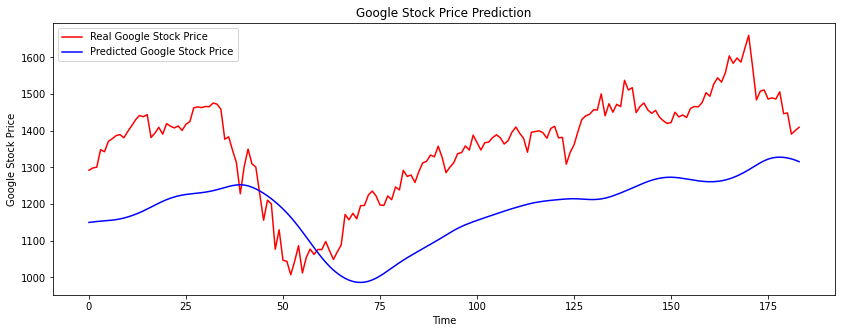

In [165]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_predict, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [123]:
from sklearn.metrics import confusion_matrix

In [126]:
cnm = confusion_matrix(y_predict,y_test)

ValueError: ignored